<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

In [ ]:
def ft0(image):
    return image.size
# Returns the pixel size of the image
def ft1(image):
    return image[:, :, 0].mean()
# Returns the average of the red-channel pictures for the images
def ft2(image):
    return image.shape[0] / image.shape[1]
#Returns the aspect ratio of the image


Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

In [1]:
# import everythings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os
import cv2

In [73]:
def ft_harris(image):
    gray = skimage.color.rgb2gray(image)
    gray = np.array(gray * 255, dtype=np.uint8)
    harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.01)
    harris_corners = np.where(harris > 0.002*harris.max())
    return len(harris_corners[0])

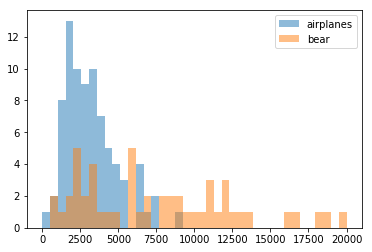

In [74]:
# EDA for Harris corner feature
path1 = '/home/sweetdum/ImageDetection/20_categories_training/airplanes/'
path2 = '/home/sweetdum/ImageDetection/20_categories_training/bear/'

def harris_corners_counter(path):
    num = []
    for fn in os.listdir(path):
        if not (fn.endswith('.jpg') or fn.endswith('.png')): 
            continue
        img = io.imread(os.path.join(path, fn))
        num.append(ft_harris(img))
    return num

airplanes = harris_corners_counter(path1)
bear = harris_corners_counter(path2)

bins = np.linspace(0, 20000, 40)
plt.hist(airplanes, bins, alpha=0.5, label='airplanes')
plt.hist(bear, bins, alpha=0.5, label='bear')
plt.legend(loc='upper right')

<h4> Graphs </h4>

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [ ]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [ ]:
feature_frame(data_from_nb1)